In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# !pip install fastaudio
# !pip install fastai==2.5.2
# !pip install matplotlib==3.2.2
# !pip install scikit-learn==1.0.2

     |████████████████████████████████| 183 kB 7.2 MB/s 
     |████████████████████████████████| 53 kB 3.0 MB/s 
     |████████████████████████████████| 1.9 MB 62.6 MB/s 
     |████████████████████████████████| 194 kB 76.0 MB/s 
     |████████████████████████████████| 804.1 MB 2.8 kB/s 
     |████████████████████████████████| 23.3 MB 1.4 MB/s 
     |████████████████████████████████| 23.3 MB 1.4 MB/s 
     |████████████████████████████████| 22.1 MB 98.2 MB/s 
     |████████████████████████████████| 22.1 MB 1.3 MB/s 
     |████████████████████████████████| 17.4 MB 143 kB/s 
  Created wheel for librosa: filename=librosa-0.8.0-py3-none-any.whl size=201396 sha256=afd0db1d7fc6719316536e8ca9a6830795122f76fbf6f4349447e78c7e1aad2c
  Stored in directory: /root/.cache/pip/wheels/de/1e/aa/d91797ae7e1ce11853ee100bee9d1781ae9d750e7458c95afb
  Created wheel for colorednoise: filename=colorednoise-1.1.1-py3-none-any.whl size=3983 sha256=824fa1c66229ad0bfcf8d09d9537704a3d8769fa295cbb400a1f14bebc9efb0b


In [ ]:
from fastai.vision.all import *
from fastaudio.core.all import *
from fastaudio.augment.all import *
from fastaudio.ci import skip_if_ci

/usr/local/lib/python3.7/dist-packages/torchaudio/backend/utils.py:47: UserWarning: "torchaudio.USE_SOUNDFILE_LEGACY_INTERFACE" flag is deprecated and will be removed in 0.9.0. Please remove the use of flag.
  '"torchaudio.USE_SOUNDFILE_LEGACY_INTERFACE" flag is deprecated and will be removed in 0.9.0. '


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import*
from imblearn.metrics import specificity_score

In [ ]:
# import os
# import sys
# import subprocess
# import numpy as np
# import glob
# import json
# import pandas as pd

# '''
# This script creates a folder "Extracted_data" inside which it extracts all the wav files in the directories date-wise
# '''

# coswara_data_dir = os.path.abspath('/content/gdrive/MyDrive/thesisDatasets/Coswara/github/') # Local Path of iiscleap/Coswara-Data Repo
# extracted_data_dir = os.path.join('/content/gdrive/MyDrive/thesisDatasets/Coswara/', 'Extracted_data')  

# if not os.path.exists(coswara_data_dir):
#     raise("Check the Coswara dataset directory!")

# if not os.path.exists(extracted_data_dir):
#     os.makedirs(extracted_data_dir) # Creates the Extracted_data folder if it doesn't exist

# dirs_extracted = set(map(os.path.basename,glob.glob('{}/202*'.format(extracted_data_dir))))
# dirs_all = set(map(os.path.basename,glob.glob('{}/202*'.format(coswara_data_dir))))

# dirs_to_extract = list(set(dirs_all) - dirs_extracted)

# for d in dirs_to_extract:
#     p = subprocess.Popen('cat {}/{}/*.tar.gz.* |tar -xvz -C {}/'.format(coswara_data_dir, d, extracted_data_dir), shell=True)
#     p.wait()


# print("Extraction process complete!")

# Preprocessing

In [ ]:
COS_loc = "/content/gdrive/MyDrive/Coswara/"
COS_data = "/content/gdrive/MyDrive/Coswara/Extracted_data/"

In [ ]:
cos_df = pd.read_csv('//content/gdrive/MyDrive/Coswara/github/combined_data.csv')
cos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2233 non-null   object 
 1   a                2233 non-null   int64  
 2   covid_status     2233 non-null   object 
 3   record_date      2233 non-null   object 
 4   ep               2233 non-null   object 
 5   g                2233 non-null   object 
 6   l_c              2233 non-null   object 
 7   l_l              1994 non-null   object 
 8   l_s              2233 non-null   object 
 9   rU               1553 non-null   object 
 10  smoker           573 non-null    object 
 11  cold             291 non-null    object 
 12  ht               183 non-null    object 
 13  diabetes         191 non-null    object 
 14  cough            385 non-null    object 
 15  ctDate           134 non-null    object 
 16  ctScan           450 non-null    object 
 17  ctScore       

In [ ]:
cos_df = cos_df[["id", "covid_status", "test_status", "others_resp", "asthma",  "pneumonia", "cld"]]
cos_df[:5]

,id,covid_status,test_status,others_resp,asthma,pneumonia,cld
0,iV3Db6t1T8b7c5HQY2TwxIhjbzD3,healthy,NaN,NaN,NaN,NaN,NaN
1,AxuYWBN0jFVLINCBqIW5aZmGCdu1,healthy,NaN,NaN,NaN,NaN,NaN
2,C5eIsssb9GSkaAgIfsHMHeR6fSh1,healthy,NaN,NaN,NaN,NaN,NaN
3,YjbEAECMBIaZKyfqOvWy5DDImUb2,healthy,NaN,NaN,NaN,NaN,NaN
4,aGOvk4ji0cVqIzCs1jHnzlw2UEy2,healthy,NaN,NaN,NaN,NaN,NaN


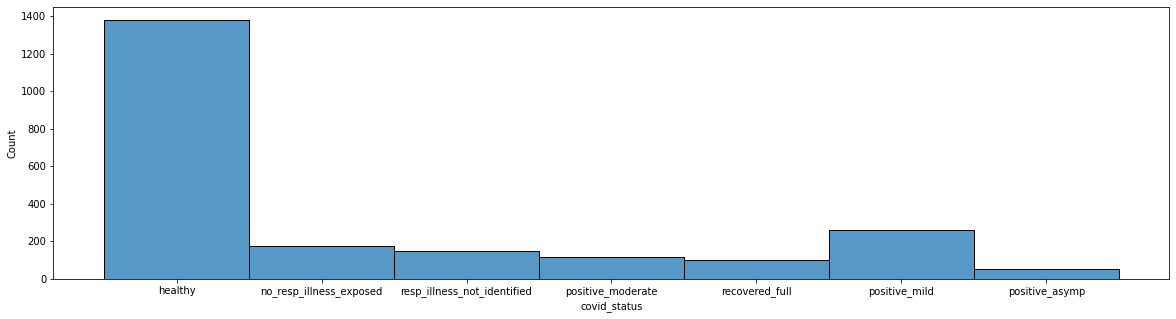

In [ ]:
plt.figure(figsize=(20,5))
sns.histplot(cos_df['covid_status'])

In [ ]:
# only covid positive & no respiratory problems samples

cos_covid = cos_df[( (cos_df.covid_status == 'positive_mild') 
                    | (cos_df.covid_status=='positive_asymp')
                    | (cos_df.covid_status =='positive_moderate') ) 
                  ]

#cos_covid.to_csv('cos_covid.csv')

print('SAMPLES: -->',len(cos_covid))
cos_covid.info()
cos_covid[:5]

SAMPLES: --> 430
<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 28 to 2232
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            430 non-null    object
 1   covid_status  430 non-null    object
 2   test_status   335 non-null    object
 3   others_resp   10 non-null     object
 4   asthma        9 non-null      object
 5   pneumonia     12 non-null     object
 6   cld           4 non-null      object
dtypes: object(7)
memory usage: 26.9+ KB


,id,covid_status,test_status,others_resp,asthma,pneumonia,cld
28,9hXEs9OejdVxG6JJGCyKQpqVvy43,positive_moderate,p,NaN,NaN,NaN,NaN
33,XbOUJCUl8GWEpQpIRMvujDE1sTE2,positive_moderate,p,NaN,NaN,NaN,NaN
34,Qcliznd3z1VdWmJOZh9nvlstTYv1,positive_moderate,p,NaN,NaN,NaN,NaN
36,AutXsDVtEcVH9ZQ58NqDunDcqZv1,positive_mild,p,True,NaN,NaN,NaN
37,dFtGnzYqh1NVAwQUQ3wkysqAe3n1,positive_asymp,p,NaN,NaN,NaN,NaN


In [ ]:
# covid healthy & no respiratory problems samples (1359 + 170)

cos_healthy = cos_df[( (cos_df.covid_status == "healthy") 
                      | (cos_df.covid_status == "no_resp_illness_exposed") )
                    ]

#cos_healthy.to_csv('cos_healthy.csv')

print('SAMPLES: -->',len(cos_healthy))
cos_healthy.info()
cos_healthy[:5]

SAMPLES: --> 1553
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1553 entries, 0 to 2226
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1553 non-null   object
 1   covid_status  1553 non-null   object
 2   test_status   331 non-null    object
 3   others_resp   1 non-null      object
 4   asthma        22 non-null     object
 5   pneumonia     0 non-null      object
 6   cld           1 non-null      object
dtypes: object(7)
memory usage: 97.1+ KB


,id,covid_status,test_status,others_resp,asthma,pneumonia,cld
0,iV3Db6t1T8b7c5HQY2TwxIhjbzD3,healthy,NaN,NaN,NaN,NaN,NaN
1,AxuYWBN0jFVLINCBqIW5aZmGCdu1,healthy,NaN,NaN,NaN,NaN,NaN
2,C5eIsssb9GSkaAgIfsHMHeR6fSh1,healthy,NaN,NaN,NaN,NaN,NaN
3,YjbEAECMBIaZKyfqOvWy5DDImUb2,healthy,NaN,NaN,NaN,NaN,NaN
4,aGOvk4ji0cVqIzCs1jHnzlw2UEy2,healthy,NaN,NaN,NaN,NaN,NaN


In [ ]:
# loads all file paths from location

cos_files = get_files(
  path = COS_data,
  extensions = '.wav',
  recurse = True
)

cos_files

(#17998) [Path('/content/gdrive/MyDrive/Coswara/Extracted_data/20200430/xa2v8z3Yzgb9dFrq2gEZz6oS7fh1/vowel-e.wav'),Path('/content/gdrive/MyDrive/Coswara/Extracted_data/20200430/xa2v8z3Yzgb9dFrq2gEZz6oS7fh1/counting-fast.wav'),Path('/content/gdrive/MyDrive/Coswara/Extracted_data/20200430/xa2v8z3Yzgb9dFrq2gEZz6oS7fh1/vowel-a.wav'),Path('/content/gdrive/MyDrive/Coswara/Extracted_data/20200430/xa2v8z3Yzgb9dFrq2gEZz6oS7fh1/cough-heavy.wav'),Path('/content/gdrive/MyDrive/Coswara/Extracted_data/20200430/xa2v8z3Yzgb9dFrq2gEZz6oS7fh1/vowel-o.wav'),Path('/content/gdrive/MyDrive/Coswara/Extracted_data/20200430/xa2v8z3Yzgb9dFrq2gEZz6oS7fh1/cough-shallow.wav'),Path('/content/gdrive/MyDrive/Coswara/Extracted_data/20200430/xa2v8z3Yzgb9dFrq2gEZz6oS7fh1/counting-normal.wav'),Path('/content/gdrive/MyDrive/Coswara/Extracted_data/20200430/xa2v8z3Yzgb9dFrq2gEZz6oS7fh1/breathing-deep.wav'),Path('/content/gdrive/MyDrive/Coswara/Extracted_data/20200430/xa2v8z3Yzgb9dFrq2gEZz6oS7fh1/breathing-shallow.wav'),Path

In [ ]:
# method to get file paths

def getit(id):
    for i in cos_files:
        folders = str(i).split("/")
        if folders[-1] == 'cough-heavy.wav':
            if folders[-2] == id:
                #print(str(i))
                return str(i)

getit(cos_covid.id.values[0]) 

'/content/gdrive/MyDrive/Coswara/Extracted_data/20210816/9hXEs9OejdVxG6JJGCyKQpqVvy43/cough-heavy.wav'

In [ ]:
# save every audio files and the corresponding label in list

file_names = []
labels = []

for i in cos_covid.id.values:
    file_names.append(getit(i))
    labels.append('COVID POSITIVE')

for i in cos_healthy.id.values:
    file_names.append(getit(i))
    labels.append('COVID NEGATIVE')
    
print(file_names[:3])
print(labels[:3])

Counter(labels)

['/content/gdrive/MyDrive/Coswara/Extracted_data/20210816/9hXEs9OejdVxG6JJGCyKQpqVvy43/cough-heavy.wav', '/content/gdrive/MyDrive/Coswara/Extracted_data/20210816/XbOUJCUl8GWEpQpIRMvujDE1sTE2/cough-heavy.wav', '/content/gdrive/MyDrive/Coswara/Extracted_data/20210816/Qcliznd3z1VdWmJOZh9nvlstTYv1/cough-heavy.wav']
['COVID POSITIVE', 'COVID POSITIVE', 'COVID POSITIVE']


Counter({'COVID NEGATIVE': 1553, 'COVID POSITIVE': 430})

In [ ]:
# dataframe for dataloader

df = pd.DataFrame({'filename' : file_names, 'category': labels})
three_df = df.copy()
three_df

In [ ]:
# # check audio files samplerate

# sr_list = []

# for i in three_df.filename.values:
#     sr_list.append(librosa.get_samplerate(i))
    
# sr_list = np.array(sr_list)

# values, counts = np.unique(sr_list, return_counts=True)
# print(values, counts)

# # check duration of each files

# dur_list = []
# failed_list = []
# for i in three_df.filename.values:
#     try:
#         y, sr = librosa.load(i)
#         dur_list.append(librosa.get_duration(y=y, sr=sr))
#     except:
#         failed_list.append(i)
#         pass
    
# dur_list = np.array(dur_list)

# print(np.mean(dur_list))
# print(np.average(dur_list))

# # files failed to load
# print(failed_list[:3])
# len(failed_list)

# # remove corrupted files
# for i in failed_list:
#     print(i)
#     three_df.drop(three_df[three_df.filename == i].index, inplace=True)
# three_df

In [ ]:
three_df = three_df.dropna()

COVID NEGATIVE    1366
COVID POSITIVE     406
Name: category, dtype: int64

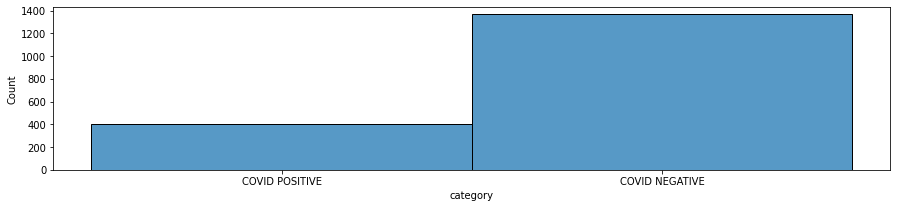

In [ ]:
# check class distribution
plt.figure(figsize=(15,3))
sns.histplot(three_df['category'])

three_df['category'].value_counts()

In [ ]:
three_df.to_csv(COS_data+'coswara_df_2class.csv', index=False) 

# Mel-Spectrogram 

In [ ]:
# resize audio to a uniform length and create mel-spectrogram from audio

cfg = AudioConfig.BasicMelSpectrogram(sample_rate=22050, n_fft=1024, hop_length=512, f_min=0.0, f_max=4000,
                                      n_mels=64, normalized=False, norm=None, mel=True, to_db=True)

crop6s = ResizeSignal(duration=6000)
a2s = AudioToSpec.from_cfg(cfg)
# SGR = SGRoll(max_shift_pct=0.5, direction=0)
# MT = MaskTime(size=5)
# MF =  MaskFreq(size=5)

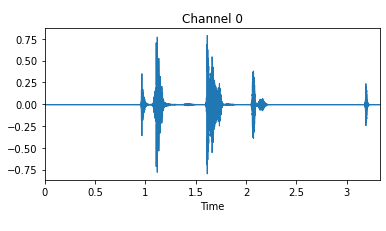

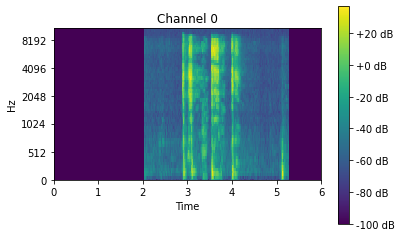

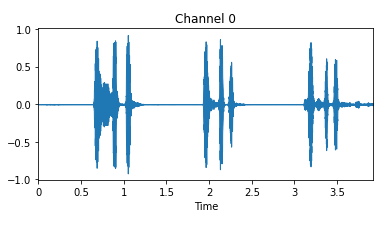

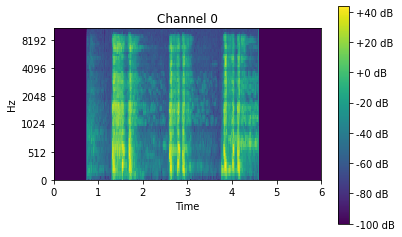

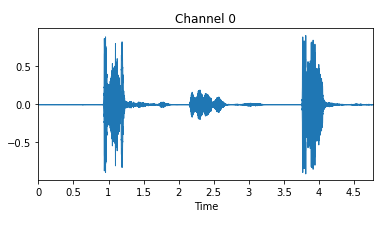

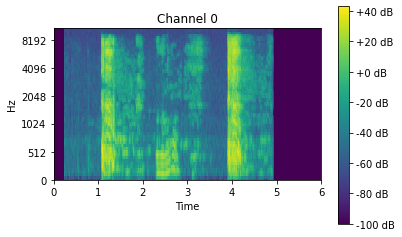

In [ ]:
# check transformations
pipe = Pipeline([AudioTensor.create, crop6s, a2s])

for fn in three_df.filename.values[42:45]:
      audio = AudioTensor.create(fn)
      audio.show()
      pipe(fn).show()

## Dataloader

In [ ]:
three_df, three_df_test = train_test_split(three_df, test_size=0.15, random_state=69, stratify=three_df.category.values)

In [ ]:
print(three_df.category.value_counts())
print(three_df_test.category.value_counts())

COVID NEGATIVE    1161
COVID POSITIVE     345
Name: category, dtype: int64
COVID NEGATIVE    205
COVID POSITIVE     61
Name: category, dtype: int64


Setting-up type transforms pipelines
0     /content/gdrive/MyDrive/Coswara/Extracted_data/20210816/9hXEs9OejdVxG6JJGCyKQpqVvy43/cough-heavy.wav  COVID POSITIVE
313   /content/gdrive/MyDrive/Coswara/Extracted_data/20210930/jyxqyMzm2IXXaETlfHjV1K6ju492/cough-heavy.wav  COVID POSITIVE
1387  /content/gdrive/MyDrive/Coswara/Extracted_data/20200413/3VWhvtBFHKMgEKxlXzMYeg5NeBN2/cough-heavy.wav  COVID NEGATIVE
311   /content/gdrive/MyDrive/Coswara/Extracted_data/20210930/UKrkCs1fdsVnZ7EfqWJCRxvIyZ22/cough-heavy.wav  COVID POSITIVE
22    /content/gdrive/MyDrive/Coswara/Extracted_data/20210816/G5wWAa7nvkOR9QvfsAt7tsd5qa82/cough-heavy.wav  COVID POSITIVE
...                                                                                                    ...             ...
587   /content/gdrive/MyDrive/Coswara/Extracted_data/20200415/D1d4hc9MrgTDxgAhqpTgqOEJtLp2/cough-heavy.wav  COVID NEGATIVE
652   /content/gdrive/MyDrive/Coswara/Extracted_data/20200415/cAqSJ74dT8S95pUV3nj98Pp12cp1/cough-heavy

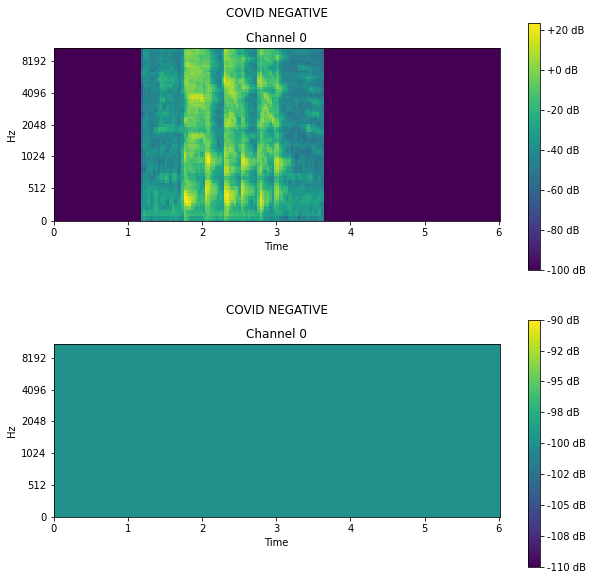

In [ ]:
item_tfms = [crop6s, a2s]

auds = DataBlock(blocks = (AudioBlock, CategoryBlock),  
                 get_x = ColReader("filename"),
                 splitter = TrainTestSplitter(test_size=0.15, random_state=69, 
                                              stratify=three_df.category.values),
                 item_tfms = item_tfms,
                 get_y = ColReader("category"))


auds.summary(three_df, show_batch=True, figsize=(10, 10))

## Check data distribution

In [ ]:
dls = auds.dataloaders(three_df, bs=32)

for i in range(10):
    x,y = dls.one_batch()
    print(np.unique(y.cpu(), return_counts=True))

print(dls.train.items.category.value_counts())
print(dls.valid.items.category.value_counts())

(array([0, 1]), array([25,  7]))
(array([0, 1]), array([19, 13]))
(array([0, 1]), array([24,  8]))
(array([0, 1]), array([23,  9]))
(array([0, 1]), array([22, 10]))
(array([0, 1]), array([24,  8]))
(array([0, 1]), array([22, 10]))
(array([0, 1]), array([25,  7]))
(array([0, 1]), array([26,  6]))
(array([0, 1]), array([25,  7]))
COVID NEGATIVE    987
COVID POSITIVE    293
Name: category, dtype: int64
COVID NEGATIVE    174
COVID POSITIVE     52
Name: category, dtype: int64


In [ ]:
test_dl = dls.test_dl(three_df_test, with_labels=True)

In [ ]:
print(dls.train.items.category.value_counts())
print(dls.valid.items.category.value_counts())
print(test_dl.items.category.value_counts())

COVID NEGATIVE    987
COVID POSITIVE    293
Name: category, dtype: int64
COVID NEGATIVE    174
COVID POSITIVE     52
Name: category, dtype: int64
COVID NEGATIVE    205
COVID POSITIVE     61
Name: category, dtype: int64
COVID NEGATIVE    987
COVID POSITIVE    293
Name: category, dtype: int64
COVID NEGATIVE    174
COVID POSITIVE     52
Name: category, dtype: int64
COVID NEGATIVE    205
COVID POSITIVE     61
Name: category, dtype: int64


# Models: Fine-tuning

### ResNet-18

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.096215,0.866838,0.725806,0.711224,01:38


Better model found at epoch 0 with accuracy value: 0.725806474685669.


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.733301,0.655600,0.733871,0.678810,00:23
1,0.606172,0.546706,0.802419,0.707644,00:23
2,0.534518,0.561543,0.782258,0.691582,00:23
3,0.478834,0.561671,0.814516,0.694485,00:23
4,0.416844,0.532234,0.810484,0.753411,00:22
5,0.368734,0.467733,0.854839,0.769956,00:23
6,0.360952,0.575443,0.774194,0.755636,00:23
7,0.305647,0.523199,0.838710,0.782196,00:23
8,0.303346,0.584999,0.774194,0.740106,00:22
9,0.286078,0.608777,0.798387,0.760474,00:23


Better model found at epoch 0 with accuracy value: 0.7338709831237793.
Better model found at epoch 1 with accuracy value: 0.8024193644523621.
Better model found at epoch 3 with accuracy value: 0.8145161271095276.
Better model found at epoch 5 with accuracy value: 0.8548387289047241.
Better model found at epoch 24 with accuracy value: 0.8588709831237793.
Better model found at epoch 31 with accuracy value: 0.8629032373428345.
Better model found at epoch 35 with accuracy value: 0.8709677457809448.
Better model found at epoch 42 with accuracy value: 0.875.
Better model found at epoch 43 with accuracy value: 0.8790322542190552.
Better model found at epoch 46 with accuracy value: 0.8830645084381104.
Better model found at epoch 49 with accuracy value: 0.8870967626571655.


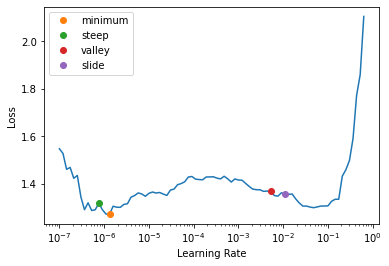

In [ ]:
# resnet 18 model
learn = cnn_learner(dls, resnet18, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fine_tune(50, lrs.valley)

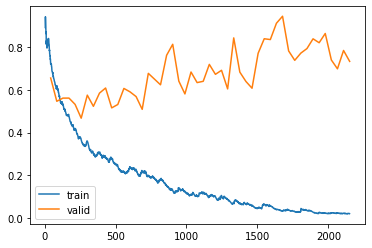

In [ ]:
learn.recorder.plot_loss()

0.8184931506849316 0.820267553892008 0.6876248915083867 0.6656616067096416 0.6656616067096416 0.7371031746031746
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       229
           1       0.62      0.40      0.49        63

    accuracy                           0.82       292
   macro avg       0.74      0.67      0.69       292
weighted avg       0.80      0.82      0.80       292



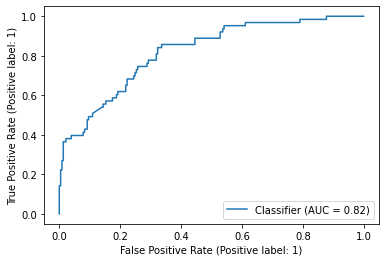

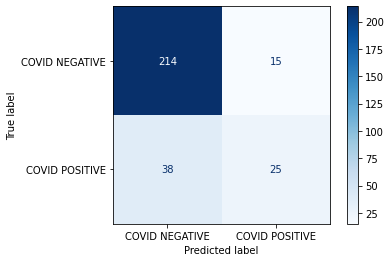

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### ResNet-34

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.202191,0.884958,0.649194,0.640784,00:21


Better model found at epoch 0 with accuracy value: 0.649193525314331.


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.801175,0.631323,0.758065,0.685680,00:22
1,0.653770,0.605811,0.709677,0.697291,00:22
2,0.509523,0.530695,0.802419,0.713304,00:22
3,0.440682,0.582421,0.778226,0.757475,00:22
4,0.422071,0.565155,0.806452,0.757813,00:22
5,0.381526,0.459090,0.838710,0.796323,00:22
6,0.372279,0.525652,0.818548,0.758055,00:22
7,0.341321,0.541500,0.814516,0.782632,00:22
8,0.323575,0.473760,0.854839,0.805322,00:22
9,0.294149,0.536740,0.814516,0.798887,00:22


Better model found at epoch 0 with accuracy value: 0.7580645084381104.
Better model found at epoch 2 with accuracy value: 0.8024193644523621.
Better model found at epoch 4 with accuracy value: 0.8064516186714172.
Better model found at epoch 5 with accuracy value: 0.8387096524238586.
Better model found at epoch 8 with accuracy value: 0.8548387289047241.
Better model found at epoch 11 with accuracy value: 0.8709677457809448.
Better model found at epoch 43 with accuracy value: 0.875.


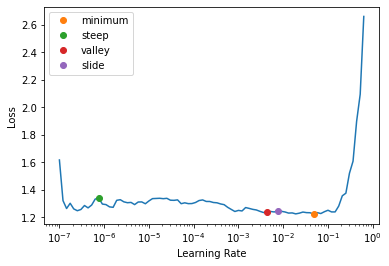

In [ ]:
learn = cnn_learner(dls, resnet34, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fine_tune(50, lrs.valley)

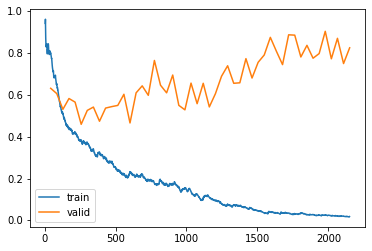

In [ ]:
learn.recorder.plot_loss()

0.8458904109589042 0.8108407846399113 0.7306438718406003 0.700388161086851 0.700388161086851 0.7995234148363033
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       229
           1       0.74      0.44      0.55        63

    accuracy                           0.85       292
   macro avg       0.80      0.70      0.73       292
weighted avg       0.84      0.85      0.83       292



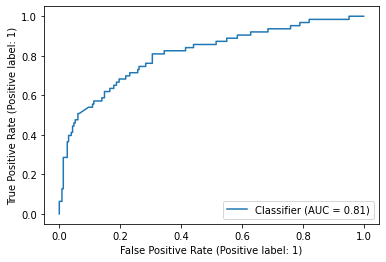

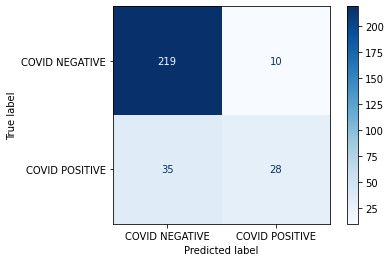

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### ResNet-50

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.222985,0.935096,0.560484,0.588486,00:22


Better model found at epoch 0 with accuracy value: 0.5604838728904724.


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.012019,0.832441,0.600806,0.656846,00:22
1,1.013823,0.743785,0.608871,0.692453,00:22
2,0.997908,0.682778,0.657258,0.719061,00:22
3,0.957735,0.748359,0.661290,0.669328,00:22
4,0.908684,0.717077,0.669355,0.643977,00:22
5,0.888148,0.619793,0.709677,0.729028,00:22
6,0.839546,0.640624,0.693548,0.673295,00:22
7,0.811334,0.643583,0.717742,0.655298,00:22
8,0.792881,0.648182,0.721774,0.681519,00:22
9,0.729792,0.560339,0.733871,0.713836,00:23


Better model found at epoch 0 with accuracy value: 0.600806474685669.
Better model found at epoch 1 with accuracy value: 0.6088709831237793.
Better model found at epoch 2 with accuracy value: 0.6572580933570862.
Better model found at epoch 3 with accuracy value: 0.6612903475761414.
Better model found at epoch 4 with accuracy value: 0.6693548560142517.
Better model found at epoch 5 with accuracy value: 0.7096773982048035.
Better model found at epoch 7 with accuracy value: 0.7177419066429138.
Better model found at epoch 8 with accuracy value: 0.7217742204666138.
Better model found at epoch 9 with accuracy value: 0.7338709831237793.
Better model found at epoch 11 with accuracy value: 0.7459677457809448.
Better model found at epoch 12 with accuracy value: 0.7862903475761414.
Better model found at epoch 13 with accuracy value: 0.8024193644523621.
Better model found at epoch 15 with accuracy value: 0.8185483813285828.
Better model found at epoch 29 with accuracy value: 0.8266128897666931.
Be

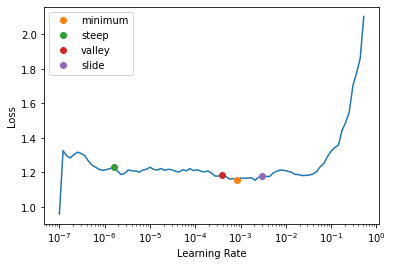

In [ ]:
learn = cnn_learner(dls, resnet50, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fine_tune(50, lrs.valley)

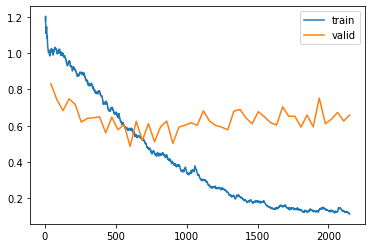

In [ ]:
learn.recorder.plot_loss()

0.8047945205479452 0.7413876758854925 0.7029077343234029 0.6971996950162889 0.6971996950162889 0.709622752726201
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       229
           1       0.55      0.51      0.53        63

    accuracy                           0.80       292
   macro avg       0.71      0.70      0.70       292
weighted avg       0.80      0.80      0.80       292



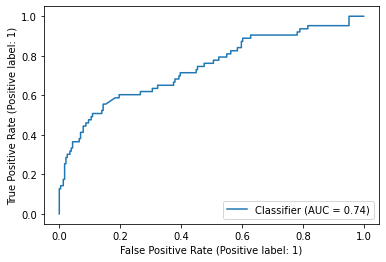

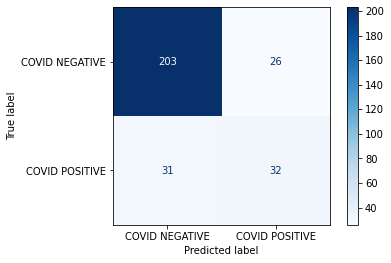

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### ResNet-101

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


  0%|          | 0.00/170M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.289737,1.175511,0.540323,0.607596,00:23


Better model found at epoch 0 with accuracy value: 0.5403226017951965.


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.082185,0.840816,0.645161,0.699226,00:24
1,0.993032,0.590661,0.745968,0.716304,00:24
2,0.884254,0.623433,0.725806,0.713933,00:24
3,0.786574,0.637838,0.729839,0.707450,00:24
4,0.717702,0.581649,0.782258,0.714320,00:24
5,0.660318,0.546741,0.778226,0.767102,00:24
6,0.639152,0.593039,0.741935,0.687905,00:24
7,0.573869,0.777438,0.770161,0.726899,00:24
8,0.534995,0.565357,0.810484,0.762990,00:24
9,0.496084,0.769047,0.737903,0.690808,00:24


Better model found at epoch 0 with accuracy value: 0.6451612710952759.
Better model found at epoch 1 with accuracy value: 0.7459677457809448.
Better model found at epoch 4 with accuracy value: 0.7822580933570862.
Better model found at epoch 8 with accuracy value: 0.8104838728904724.
Better model found at epoch 12 with accuracy value: 0.8185483813285828.
Better model found at epoch 13 with accuracy value: 0.8225806355476379.
Better model found at epoch 16 with accuracy value: 0.850806474685669.
Better model found at epoch 30 with accuracy value: 0.8588709831237793.
Better model found at epoch 49 with accuracy value: 0.8709677457809448.


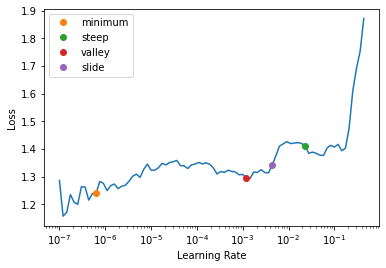

In [ ]:
learn = cnn_learner(dls, resnet101, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fine_tune(50, lrs.valley)

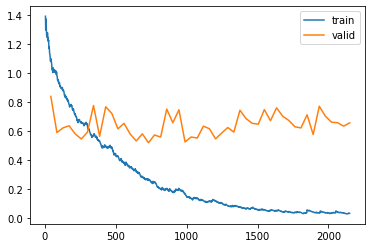

In [ ]:
learn.recorder.plot_loss()

0.8595890410958904 0.8150689679073958 0.7583513311668652 0.726381091009912 0.726381091009912 0.8240079365079365
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       229
           1       0.78      0.49      0.60        63

    accuracy                           0.86       292
   macro avg       0.82      0.73      0.76       292
weighted avg       0.85      0.86      0.85       292



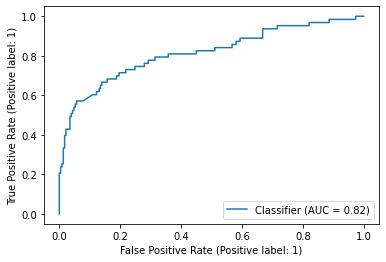

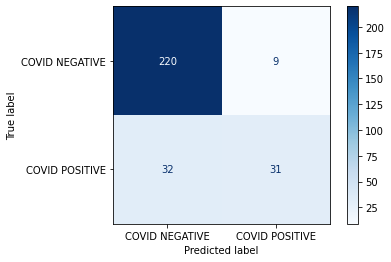

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### vgg16_bn

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.020017,0.882242,0.673387,0.585244,00:23


Better model found at epoch 0 with accuracy value: 0.6733871102333069.


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.628881,0.605090,0.814516,0.685680,00:23
1,0.478852,0.505634,0.794355,0.752733,00:23
2,0.363250,0.529106,0.818548,0.753507,00:23
3,0.299844,0.599109,0.814516,0.772908,00:22
4,0.244070,0.663381,0.822581,0.722835,00:22
5,0.270786,0.628630,0.806452,0.748283,00:23
6,0.261871,0.545744,0.846774,0.818771,00:22
7,0.262049,0.754192,0.762097,0.779487,00:23
8,0.255846,0.621529,0.826613,0.791340,00:22
9,0.227873,0.656085,0.818548,0.783067,00:23


Better model found at epoch 0 with accuracy value: 0.8145161271095276.
Better model found at epoch 2 with accuracy value: 0.8185483813285828.
Better model found at epoch 4 with accuracy value: 0.8225806355476379.
Better model found at epoch 6 with accuracy value: 0.8467742204666138.
Better model found at epoch 12 with accuracy value: 0.8588709831237793.
Better model found at epoch 14 with accuracy value: 0.8709677457809448.
Better model found at epoch 32 with accuracy value: 0.8870967626571655.


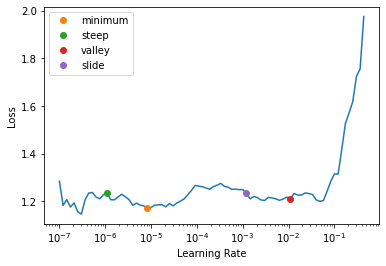

In [ ]:
learn = cnn_learner(dls, vgg16_bn, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fine_tune(50, lrs.valley)

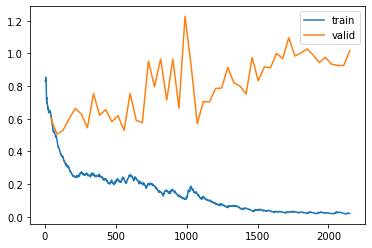

In [ ]:
learn.recorder.plot_loss()

0.8458904109589042 0.807305746170375 0.7218400050805478 0.6888819574409094 0.6888819574409094 0.8106475148198814
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       229
           1       0.76      0.41      0.54        63

    accuracy                           0.85       292
   macro avg       0.81      0.69      0.72       292
weighted avg       0.84      0.85      0.83       292



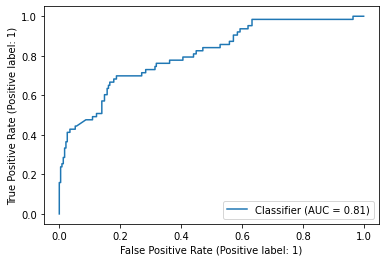

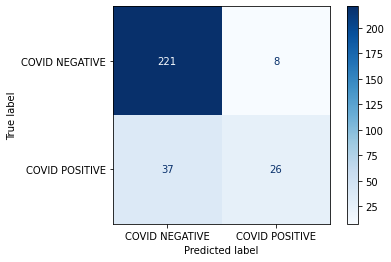

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### vgg19_bn

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.104213,0.704554,0.661290,0.649395,00:22


Better model found at epoch 0 with accuracy value: 0.6612903475761414.


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.815622,0.628251,0.741935,0.727431,00:23
1,0.713173,0.567346,0.754032,0.686502,00:23
2,0.595742,0.582025,0.794355,0.710982,00:23
3,0.522534,0.511159,0.814516,0.738413,00:23
4,0.452534,0.538516,0.850806,0.727866,00:23
5,0.398819,0.706822,0.778226,0.723512,00:23
6,0.373449,0.647228,0.818548,0.689308,00:23
7,0.340477,0.647178,0.818548,0.762796,00:23
8,0.304105,0.675128,0.830645,0.744944,00:23
9,0.281132,0.769660,0.806452,0.757668,00:23


Better model found at epoch 0 with accuracy value: 0.7419354915618896.
Better model found at epoch 1 with accuracy value: 0.7540322542190552.
Better model found at epoch 2 with accuracy value: 0.7943548560142517.
Better model found at epoch 3 with accuracy value: 0.8145161271095276.
Better model found at epoch 4 with accuracy value: 0.850806474685669.
Better model found at epoch 11 with accuracy value: 0.8629032373428345.
Better model found at epoch 30 with accuracy value: 0.8669354915618896.
Better model found at epoch 38 with accuracy value: 0.875.
Better model found at epoch 39 with accuracy value: 0.8830645084381104.
Better model found at epoch 43 with accuracy value: 0.8870967626571655.
Better model found at epoch 47 with accuracy value: 0.8911290168762207.


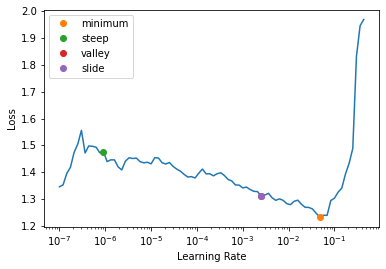

In [ ]:
learn = cnn_learner(dls, vgg19_bn, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fine_tune(50, lrs.valley)

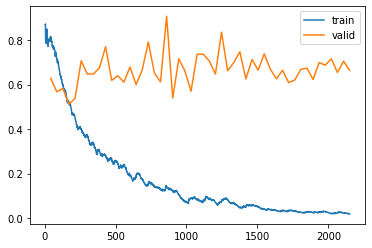

In [ ]:
learn.recorder.plot_loss()

0.8287671232876712 0.7900464407014625 0.6934576299655665 0.6664587232272822 0.6664587232272822 0.7669816564758198
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       229
           1       0.69      0.38      0.49        63

    accuracy                           0.83       292
   macro avg       0.77      0.67      0.69       292
weighted avg       0.81      0.83      0.81       292



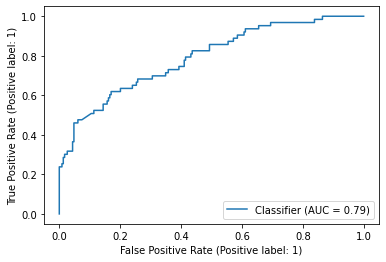

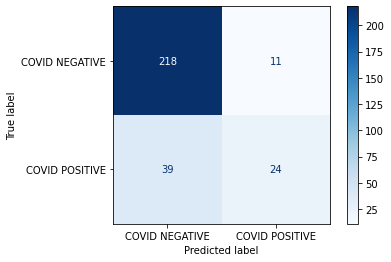

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### alexnet

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.066134,0.810073,0.681452,0.632559,00:21


Better model found at epoch 0 with accuracy value: 0.6814516186714172.


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.720901,0.649848,0.758065,0.623803,00:21
1,0.664588,1.168674,0.762097,0.724867,00:21
2,0.589507,0.772586,0.790323,0.693904,00:21
3,0.556385,0.470523,0.798387,0.731447,00:21
4,0.537097,0.544055,0.798387,0.702564,00:21
5,0.524274,0.679758,0.818548,0.687325,00:21
6,0.534239,0.860292,0.778226,0.689066,00:20
7,0.496763,0.573582,0.729839,0.668457,00:21
8,0.485040,0.514438,0.790323,0.740300,00:21
9,0.493166,0.492216,0.802419,0.722109,00:20


Better model found at epoch 0 with accuracy value: 0.7580645084381104.
Better model found at epoch 1 with accuracy value: 0.7620967626571655.
Better model found at epoch 2 with accuracy value: 0.7903226017951965.
Better model found at epoch 3 with accuracy value: 0.7983871102333069.
Better model found at epoch 5 with accuracy value: 0.8185483813285828.
Better model found at epoch 11 with accuracy value: 0.8266128897666931.
Better model found at epoch 16 with accuracy value: 0.8467742204666138.
Better model found at epoch 26 with accuracy value: 0.850806474685669.
Better model found at epoch 40 with accuracy value: 0.8548387289047241.


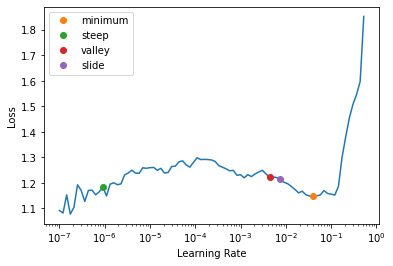

In [ ]:
learn = cnn_learner(dls, alexnet, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fine_tune(50, lrs.valley)

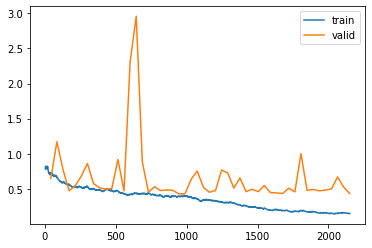

In [ ]:
learn.recorder.plot_loss()

0.821917808219178 0.7646080266167602 0.7087840429612582 0.690857420115062 0.690857420115062 0.7391228831958315
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       229
           1       0.62      0.46      0.53        63

    accuracy                           0.82       292
   macro avg       0.74      0.69      0.71       292
weighted avg       0.81      0.82      0.81       292



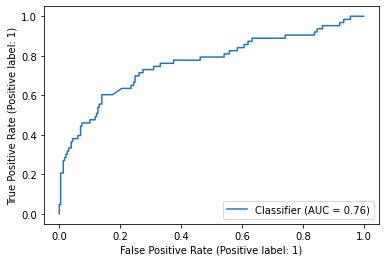

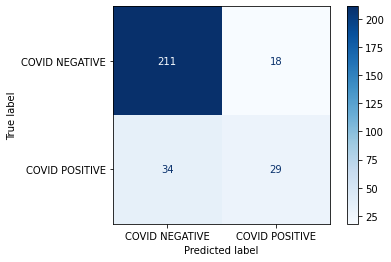

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### squeezenet1_0

Downloading: "https://download.pytorch.org/models/squeezenet1_0-a815701f.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_0-a815701f.pth


  0%|          | 0.00/4.79M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.018224,1.172835,0.645161,0.620223,00:21


Better model found at epoch 0 with accuracy value: 0.6451612710952759.


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.717973,0.889212,0.729839,0.695985,00:21
1,0.663861,1.237638,0.782258,0.711369,00:21
2,0.596954,9.767388,0.794355,0.650895,00:21
3,0.555734,5.073520,0.750000,0.695839,00:21
4,0.536054,0.561861,0.798387,0.702225,00:21
5,0.544984,0.606704,0.794355,0.679003,00:21
6,0.526335,1.202119,0.741935,0.674843,00:21
7,0.531612,0.576271,0.697581,0.655443,00:21
8,0.547494,0.613984,0.741935,0.678374,00:21
9,0.545742,0.726199,0.750000,0.641848,00:21


Better model found at epoch 0 with accuracy value: 0.7298387289047241.
Better model found at epoch 1 with accuracy value: 0.7822580933570862.
Better model found at epoch 2 with accuracy value: 0.7943548560142517.
Better model found at epoch 4 with accuracy value: 0.7983871102333069.
Better model found at epoch 19 with accuracy value: 0.8104838728904724.
Better model found at epoch 24 with accuracy value: 0.8387096524238586.
Better model found at epoch 45 with accuracy value: 0.8427419066429138.


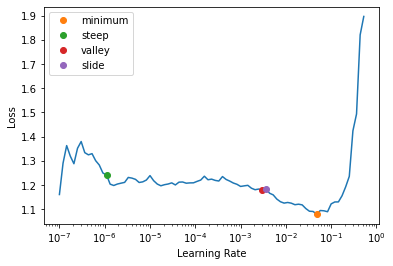

In [ ]:
learn = cnn_learner(dls, squeezenet1_0, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fine_tune(50, lrs.valley)

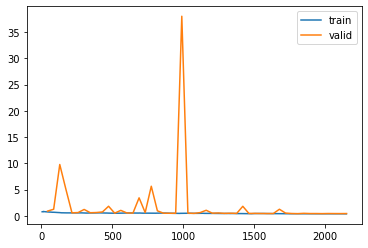

In [ ]:
learn.recorder.plot_loss()

0.8321917808219178 0.8071671172107853 0.7020097886077268 0.6743952311637901 0.6743952311637901 0.7730034722222222
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       229
           1       0.69      0.40      0.51        63

    accuracy                           0.83       292
   macro avg       0.77      0.67      0.70       292
weighted avg       0.82      0.83      0.81       292



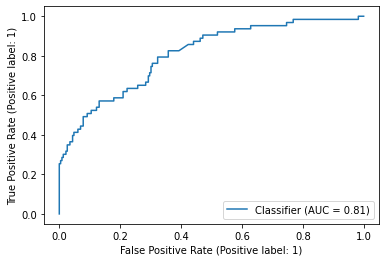

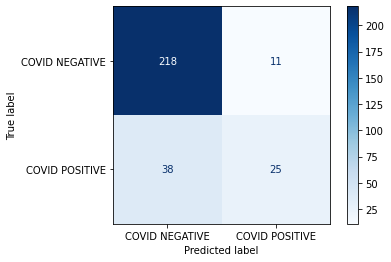

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### densenet121

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


  0%|          | 0.00/30.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.090567,0.746221,0.681452,0.625206,00:24


Better model found at epoch 0 with accuracy value: 0.6814516186714172.


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.770510,0.537700,0.774194,0.720126,00:25
1,0.657294,0.551071,0.762097,0.715288,00:24
2,0.562761,0.508725,0.798387,0.745283,00:25
3,0.523934,0.602310,0.774194,0.726512,00:24
4,0.504767,0.577360,0.762097,0.698742,00:24
5,0.467549,0.556995,0.790323,0.715288,00:24
6,0.442534,0.501879,0.810484,0.747605,00:25
7,0.390193,0.621041,0.766129,0.734494,00:24
8,0.379676,0.611561,0.818548,0.716884,00:25
9,0.343565,0.648026,0.778226,0.704257,00:25


Better model found at epoch 0 with accuracy value: 0.774193525314331.
Better model found at epoch 2 with accuracy value: 0.7983871102333069.
Better model found at epoch 6 with accuracy value: 0.8104838728904724.
Better model found at epoch 8 with accuracy value: 0.8185483813285828.
Better model found at epoch 16 with accuracy value: 0.8346773982048035.
Better model found at epoch 27 with accuracy value: 0.8387096524238586.
Better model found at epoch 29 with accuracy value: 0.8467742204666138.
Better model found at epoch 31 with accuracy value: 0.8629032373428345.


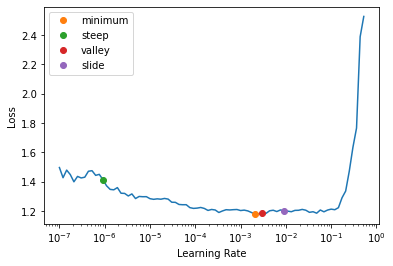

In [ ]:
learn = cnn_learner(dls, densenet121, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fine_tune(50, lrs.valley)

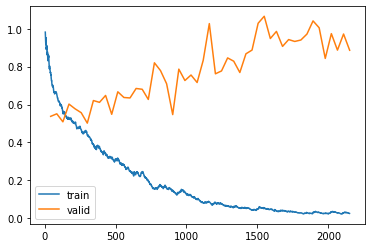

In [ ]:
learn.recorder.plot_loss()

0.821917808219178 0.7890760379843349 0.7003236756927449 0.6793512164691203 0.6793512164691203 0.741664331745587
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       229
           1       0.63      0.43      0.51        63

    accuracy                           0.82       292
   macro avg       0.74      0.68      0.70       292
weighted avg       0.81      0.82      0.81       292



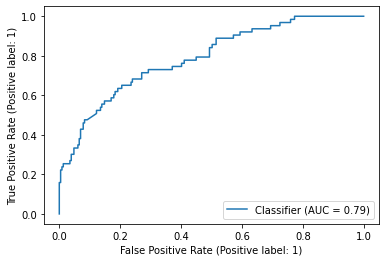

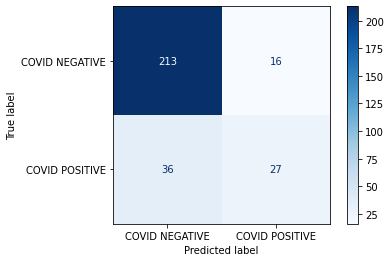

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### xresnet50

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.083343,0.610275,0.705645,0.660813,00:22


Better model found at epoch 0 with accuracy value: 0.7056451439857483.


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.633544,0.458667,0.798387,0.773053,00:23
1,0.563606,0.447106,0.822581,0.764054,00:23
2,0.528108,0.529017,0.782258,0.740832,00:22
3,0.522317,0.487883,0.814516,0.750169,00:22
4,0.505356,0.468667,0.814516,0.751572,00:23
5,0.506177,0.448994,0.826613,0.762216,00:23
6,0.465495,0.507134,0.810484,0.761297,00:23
7,0.449494,0.418845,0.822581,0.798307,00:23
8,0.423002,0.446303,0.830645,0.803241,00:23
9,0.419045,0.523220,0.810484,0.762651,00:23


Better model found at epoch 0 with accuracy value: 0.7983871102333069.
Better model found at epoch 1 with accuracy value: 0.8225806355476379.
Better model found at epoch 5 with accuracy value: 0.8266128897666931.
Better model found at epoch 8 with accuracy value: 0.8306451439857483.
Better model found at epoch 13 with accuracy value: 0.8427419066429138.
Better model found at epoch 32 with accuracy value: 0.8467742204666138.


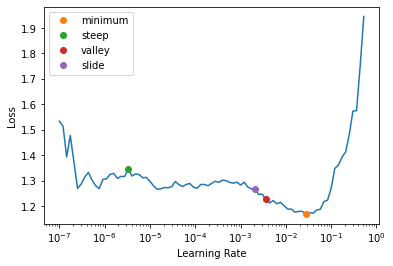

In [ ]:
learn = cnn_learner(dls, xresnet50, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fine_tune(50, lrs.valley)

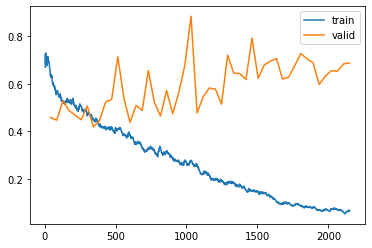

In [ ]:
learn.recorder.plot_loss()

0.8287671232876712 0.8103555832813476 0.7377873563218391 0.7297428432799612 0.7297428432799612 0.7474430757745427
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       229
           1       0.61      0.56      0.58        63

    accuracy                           0.83       292
   macro avg       0.75      0.73      0.74       292
weighted avg       0.82      0.83      0.83       292



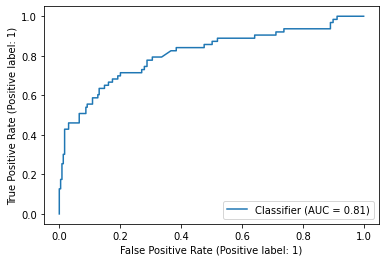

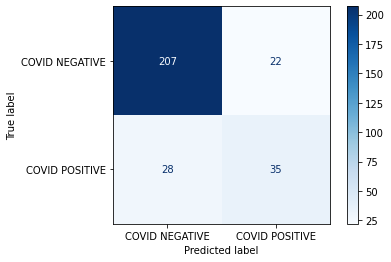

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

# Models: 1cycle policy

### ResNet-18

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.216861,0.831709,0.588710,0.610692,00:21
1,1.016810,0.681703,0.745968,0.608079,00:21
2,0.880033,0.733796,0.689516,0.635946,00:21
3,0.790453,0.668644,0.750000,0.658394,00:21
4,0.718034,0.618244,0.745968,0.629463,00:21
5,0.623195,0.527790,0.774194,0.704935,00:21
6,0.562323,0.550109,0.750000,0.718868,00:21
7,0.520350,0.542979,0.806452,0.726415,00:21
8,0.529243,0.748621,0.754032,0.601984,00:21
9,0.559243,0.750883,0.741935,0.696904,00:21


Better model found at epoch 0 with accuracy value: 0.5887096524238586.
Better model found at epoch 1 with accuracy value: 0.7459677457809448.
Better model found at epoch 3 with accuracy value: 0.75.
Better model found at epoch 5 with accuracy value: 0.774193525314331.
Better model found at epoch 7 with accuracy value: 0.8064516186714172.
Better model found at epoch 10 with accuracy value: 0.8104838728904724.
Better model found at epoch 13 with accuracy value: 0.8387096524238586.
Better model found at epoch 25 with accuracy value: 0.850806474685669.


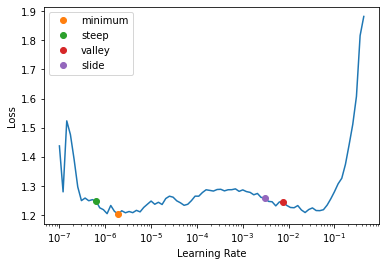

In [ ]:
learn = cnn_learner(dls, resnet18, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fit_one_cycle(50, lrs.valley)

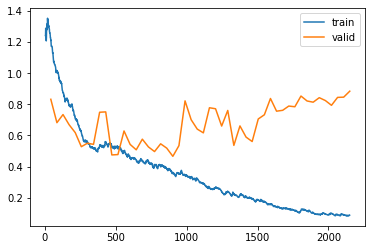

In [ ]:
learn.recorder.plot_loss()

0.8458904109589042 0.8372496014417411 0.7462095605987444 0.7234005683787343 0.7234005683787343 0.7848179568752209
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       229
           1       0.70      0.51      0.59        63

    accuracy                           0.85       292
   macro avg       0.78      0.72      0.75       292
weighted avg       0.84      0.85      0.84       292



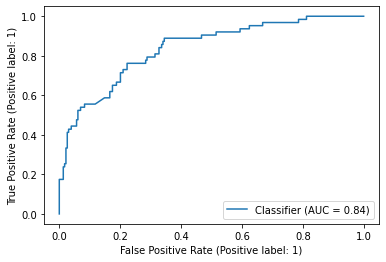

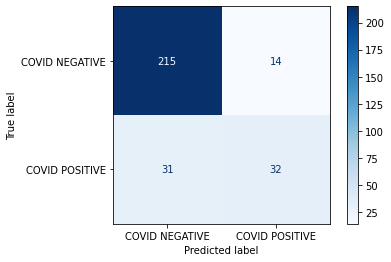

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### ResNet-34

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.151991,0.886474,0.592742,0.611079,00:23
1,1.071434,0.835058,0.600806,0.600048,00:22
2,0.981779,0.662714,0.685484,0.630044,00:21
3,0.836061,0.568731,0.741935,0.686647,00:22
4,0.777670,0.648745,0.778226,0.648960,00:21
5,0.692842,0.616331,0.762097,0.643687,00:22
6,0.604952,0.505345,0.782258,0.717804,00:22
7,0.531315,0.605106,0.754032,0.643880,00:23
8,0.492515,0.633295,0.786290,0.721674,00:22
9,0.487671,0.608925,0.758065,0.683648,00:21


Better model found at epoch 0 with accuracy value: 0.5927419066429138.
Better model found at epoch 1 with accuracy value: 0.600806474685669.
Better model found at epoch 2 with accuracy value: 0.6854838728904724.
Better model found at epoch 3 with accuracy value: 0.7419354915618896.
Better model found at epoch 4 with accuracy value: 0.7782257795333862.
Better model found at epoch 6 with accuracy value: 0.7822580933570862.
Better model found at epoch 8 with accuracy value: 0.7862903475761414.
Better model found at epoch 10 with accuracy value: 0.8185483813285828.
Better model found at epoch 19 with accuracy value: 0.8225806355476379.
Better model found at epoch 35 with accuracy value: 0.8306451439857483.
Better model found at epoch 41 with accuracy value: 0.8346773982048035.
Better model found at epoch 49 with accuracy value: 0.8427419066429138.


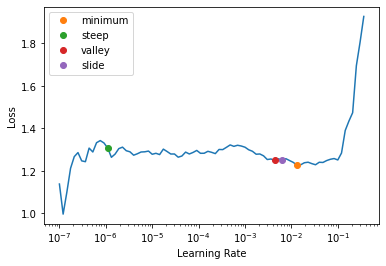

In [ ]:
learn = cnn_learner(dls, resnet34, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fit_one_cycle(50, lrs.valley)

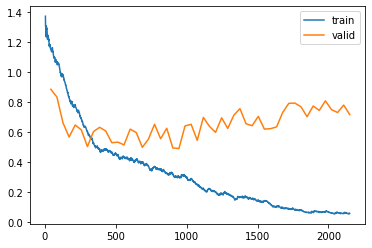

In [ ]:
learn.recorder.plot_loss()

0.8321917808219178 0.8253968253968255 0.7381357638316953 0.7261731475705275 0.7261731475705275 0.7538904450669157
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       229
           1       0.63      0.54      0.58        63

    accuracy                           0.83       292
   macro avg       0.75      0.73      0.74       292
weighted avg       0.82      0.83      0.83       292



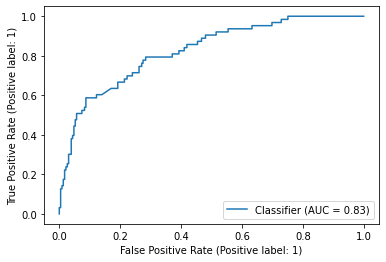

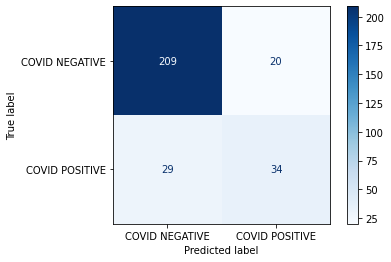

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### ResNet-50

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.326969,0.938278,0.516129,0.548234,00:22
1,1.232253,0.954512,0.467742,0.557475,00:22
2,1.175844,0.791862,0.568548,0.636865,00:22
3,1.090115,0.826045,0.592742,0.585535,00:22
4,1.074636,0.742569,0.633065,0.667489,00:22
5,1.017144,0.708800,0.645161,0.651621,00:22
6,0.985833,0.753256,0.649194,0.690034,00:22
7,0.917117,0.780657,0.653226,0.650266,00:22
8,0.881229,0.620112,0.705645,0.679874,00:22
9,0.814853,0.572897,0.709677,0.705902,00:22


Better model found at epoch 0 with accuracy value: 0.5161290168762207.
Better model found at epoch 2 with accuracy value: 0.5685483813285828.
Better model found at epoch 3 with accuracy value: 0.5927419066429138.
Better model found at epoch 4 with accuracy value: 0.6330645084381104.
Better model found at epoch 5 with accuracy value: 0.6451612710952759.
Better model found at epoch 6 with accuracy value: 0.649193525314331.
Better model found at epoch 7 with accuracy value: 0.6532257795333862.
Better model found at epoch 8 with accuracy value: 0.7056451439857483.
Better model found at epoch 9 with accuracy value: 0.7096773982048035.
Better model found at epoch 10 with accuracy value: 0.7217742204666138.
Better model found at epoch 11 with accuracy value: 0.7580645084381104.
Better model found at epoch 15 with accuracy value: 0.8104838728904724.
Better model found at epoch 22 with accuracy value: 0.8185483813285828.
Better model found at epoch 31 with accuracy value: 0.8225806355476379.
Be

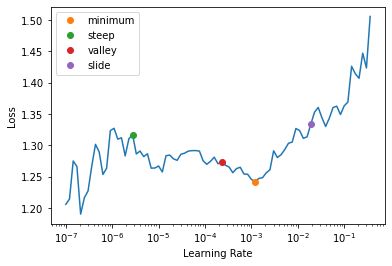

In [ ]:
learn = cnn_learner(dls, resnet50, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fit_one_cycle(50, lrs.valley)

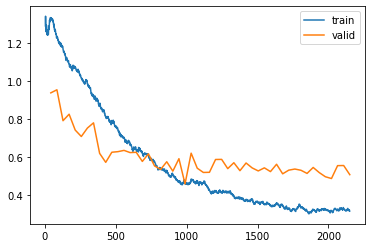

In [ ]:
learn.recorder.plot_loss()

0.8356164383561644 0.7406252166077494 0.7149133512326092 0.6880848409232688 0.6880848409232688 0.7750076010945577
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       229
           1       0.69      0.43      0.53        63

    accuracy                           0.84       292
   macro avg       0.78      0.69      0.71       292
weighted avg       0.82      0.84      0.82       292



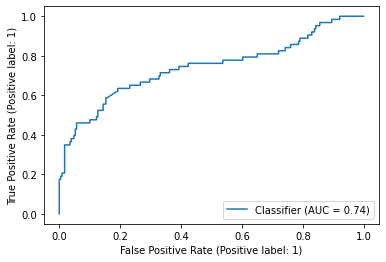

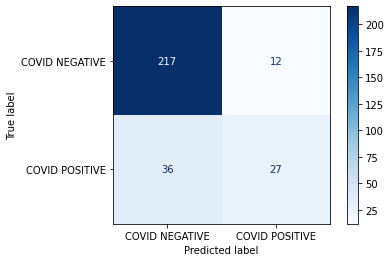

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### ResNet-101

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.356735,0.897725,0.560484,0.560474,00:23
1,1.286026,0.861046,0.532258,0.591824,00:23
2,1.236723,0.821689,0.572581,0.619303,00:24
3,1.167704,0.802940,0.584677,0.629124,00:23
4,1.106585,0.710395,0.604839,0.661490,00:24
5,1.085137,0.876108,0.616935,0.673924,00:23
6,1.090253,0.631351,0.713710,0.731737,00:23
7,1.043161,0.669755,0.681452,0.731640,00:24
8,0.976922,0.653287,0.701613,0.696420,00:24
9,0.909301,0.603953,0.741935,0.723367,00:24


Better model found at epoch 0 with accuracy value: 0.5604838728904724.
Better model found at epoch 2 with accuracy value: 0.5725806355476379.
Better model found at epoch 3 with accuracy value: 0.5846773982048035.
Better model found at epoch 4 with accuracy value: 0.6048387289047241.
Better model found at epoch 5 with accuracy value: 0.6169354915618896.
Better model found at epoch 6 with accuracy value: 0.7137096524238586.
Better model found at epoch 9 with accuracy value: 0.7419354915618896.
Better model found at epoch 10 with accuracy value: 0.75.
Better model found at epoch 12 with accuracy value: 0.7822580933570862.
Better model found at epoch 18 with accuracy value: 0.7943548560142517.
Better model found at epoch 25 with accuracy value: 0.7983871102333069.
Better model found at epoch 27 with accuracy value: 0.8145161271095276.
Better model found at epoch 28 with accuracy value: 0.8185483813285828.
Better model found at epoch 31 with accuracy value: 0.8306451439857483.
Better model 

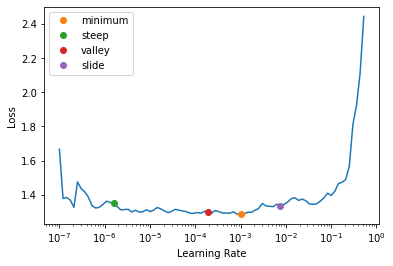

In [ ]:
learn = cnn_learner(dls, resnet101, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fit_one_cycle(50, lrs.valley)

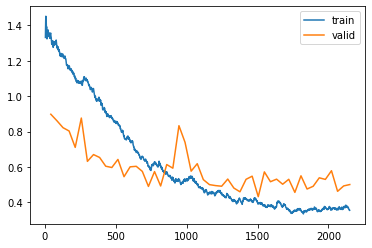

In [ ]:
learn.recorder.plot_loss()

0.8287671232876712 0.7544881125667152 0.711849688166101 0.6894711305191654 0.6894711305191654 0.7553002708508453
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       229
           1       0.65      0.44      0.53        63

    accuracy                           0.83       292
   macro avg       0.76      0.69      0.71       292
weighted avg       0.81      0.83      0.82       292



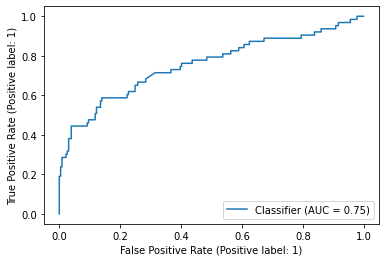

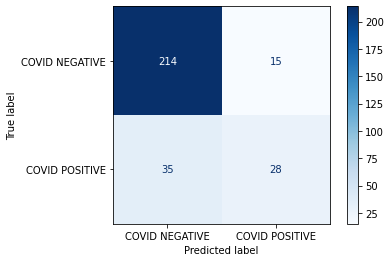

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### vgg16_bn

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.232120,0.861598,0.504032,0.574601,00:22
1,1.130992,0.728389,0.645161,0.686018,00:22
2,1.016516,0.683735,0.641129,0.661442,00:22
3,0.917843,0.677787,0.645161,0.686164,00:22
4,0.793114,0.601822,0.729839,0.662071,00:22
5,0.718390,0.499652,0.798387,0.747121,00:22
6,0.654182,0.521131,0.725806,0.721771,00:22
7,0.624372,0.493174,0.794355,0.728447,00:22
8,0.575756,0.618403,0.717742,0.686164,00:22
9,0.512513,0.497499,0.778226,0.724577,00:22


Better model found at epoch 0 with accuracy value: 0.5040322542190552.
Better model found at epoch 1 with accuracy value: 0.6451612710952759.
Better model found at epoch 4 with accuracy value: 0.7298387289047241.
Better model found at epoch 5 with accuracy value: 0.7983871102333069.
Better model found at epoch 11 with accuracy value: 0.8064516186714172.
Better model found at epoch 12 with accuracy value: 0.8185483813285828.
Better model found at epoch 13 with accuracy value: 0.8266128897666931.
Better model found at epoch 14 with accuracy value: 0.8427419066429138.
Better model found at epoch 20 with accuracy value: 0.8467742204666138.
Better model found at epoch 24 with accuracy value: 0.8588709831237793.
Better model found at epoch 35 with accuracy value: 0.8629032373428345.
Better model found at epoch 39 with accuracy value: 0.875.


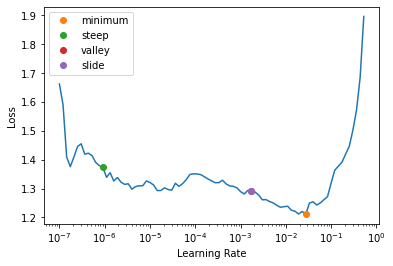

In [ ]:
learn = cnn_learner(dls, vgg16_bn, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fit_one_cycle(50, lrs.valley)

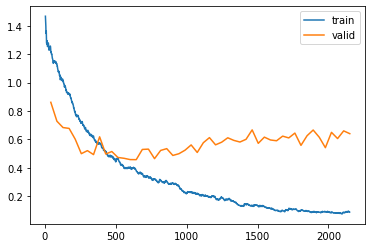

In [ ]:
learn.recorder.plot_loss()

0.8047945205479452 0.7555971442434324 0.6992138791000271 0.691446593193318 0.691446593193318 0.7089891041162228
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       229
           1       0.55      0.49      0.52        63

    accuracy                           0.80       292
   macro avg       0.71      0.69      0.70       292
weighted avg       0.80      0.80      0.80       292



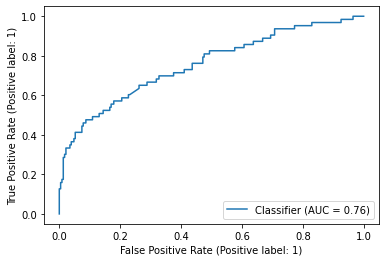

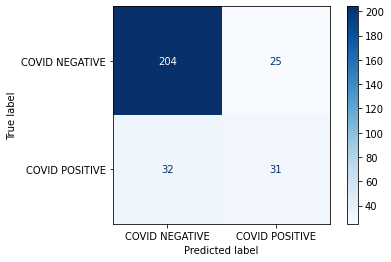

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### vgg19_bn

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.284491,0.887033,0.451613,0.476681,00:22
1,1.186401,0.824746,0.532258,0.603338,00:23
2,1.099817,0.696881,0.669355,0.672327,00:22
3,1.060520,0.662155,0.616935,0.677358,00:22
4,0.975454,0.635911,0.673387,0.664490,00:22
5,0.901316,0.565382,0.741935,0.735414,00:22
6,0.804590,0.593389,0.717742,0.630624,00:22
7,0.711893,0.599940,0.713710,0.699323,00:22
8,0.652863,0.559906,0.745968,0.704644,00:22
9,0.608485,0.504248,0.802419,0.705128,00:22


Better model found at epoch 0 with accuracy value: 0.4516128897666931.
Better model found at epoch 1 with accuracy value: 0.5322580933570862.
Better model found at epoch 2 with accuracy value: 0.6693548560142517.
Better model found at epoch 4 with accuracy value: 0.6733871102333069.
Better model found at epoch 5 with accuracy value: 0.7419354915618896.
Better model found at epoch 8 with accuracy value: 0.7459677457809448.
Better model found at epoch 9 with accuracy value: 0.8024193644523621.
Better model found at epoch 11 with accuracy value: 0.8306451439857483.
Better model found at epoch 18 with accuracy value: 0.8548387289047241.
Better model found at epoch 27 with accuracy value: 0.8629032373428345.
Better model found at epoch 45 with accuracy value: 0.8669354915618896.
Better model found at epoch 47 with accuracy value: 0.8830645084381104.


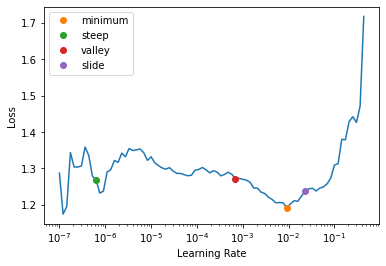

In [ ]:
learn = cnn_learner(dls, vgg19_bn, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fit_one_cycle(50, lrs.valley)

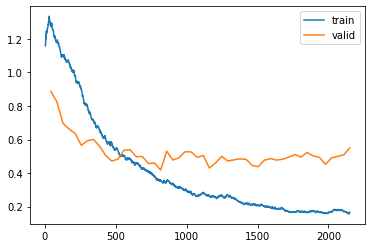

In [ ]:
learn.recorder.plot_loss()

0.8047945205479452 0.7186525265127885 0.6690724724127647 0.6511748804325224 0.6511748804325224 0.7077142857142857
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       229
           1       0.57      0.38      0.46        63

    accuracy                           0.80       292
   macro avg       0.71      0.65      0.67       292
weighted avg       0.79      0.80      0.79       292



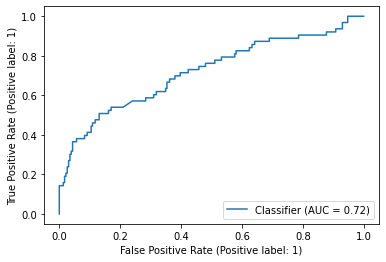

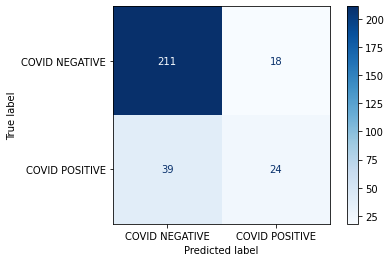

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### alexnet

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.280491,0.821923,0.576613,0.557088,00:21
1,1.189927,0.749460,0.661290,0.618433,00:21
2,1.052097,0.644300,0.705645,0.603145,00:21
3,0.898317,0.646469,0.741935,0.661877,00:21
4,0.784588,2.132038,0.774194,0.628689,00:21
5,0.739510,1.126537,0.758065,0.586502,00:21
6,0.666586,1.416260,0.758065,0.667054,00:21
7,0.612621,0.574008,0.750000,0.695356,00:21
8,0.584538,0.528233,0.766129,0.687760,00:21
9,0.567553,0.945864,0.774194,0.632269,00:21


Better model found at epoch 0 with accuracy value: 0.5766128897666931.
Better model found at epoch 1 with accuracy value: 0.6612903475761414.
Better model found at epoch 2 with accuracy value: 0.7056451439857483.
Better model found at epoch 3 with accuracy value: 0.7419354915618896.
Better model found at epoch 4 with accuracy value: 0.774193525314331.
Better model found at epoch 12 with accuracy value: 0.8024193644523621.
Better model found at epoch 21 with accuracy value: 0.8145161271095276.
Better model found at epoch 27 with accuracy value: 0.8266128897666931.


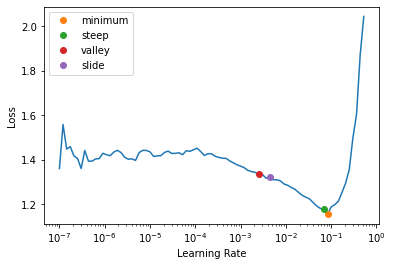

In [ ]:
learn = cnn_learner(dls, alexnet, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fit_one_cycle(50, lrs.valley)

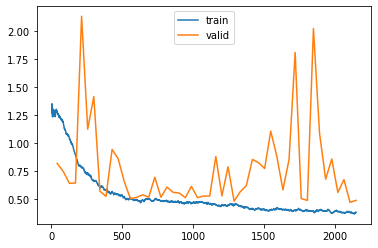

In [ ]:
learn.recorder.plot_loss()

0.791095890410959 0.7056214043113607 0.6029690390745157 0.5906633395716365 0.5906633395716365 0.676948051948052
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       229
           1       0.54      0.24      0.33        63

    accuracy                           0.79       292
   macro avg       0.68      0.59      0.60       292
weighted avg       0.76      0.79      0.76       292



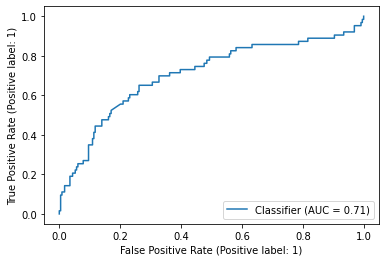

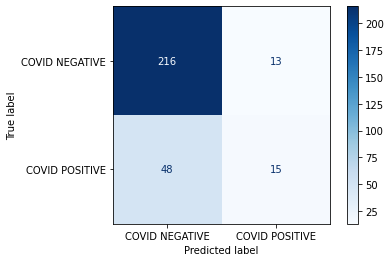

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### squeezenet1_0

Downloading: "https://download.pytorch.org/models/squeezenet1_0-a815701f.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_0-a815701f.pth


  0%|          | 0.00/4.79M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.205136,2.636726,0.592920,0.566092,00:47
1,1.040247,1.032712,0.650442,0.592175,00:20
2,0.922966,1.603017,0.712389,0.594385,00:20
3,0.849397,1.105701,0.743363,0.625000,00:20
4,0.735846,0.721654,0.752212,0.663351,00:20
5,0.676075,1.190636,0.730088,0.577034,00:20
6,0.633204,0.826792,0.743363,0.629089,00:19
7,0.580103,2.061471,0.721239,0.567087,00:21
8,0.535550,0.875796,0.752212,0.633510,00:20
9,0.516925,0.698457,0.730088,0.624337,00:20


Better model found at epoch 0 with accuracy value: 0.5929203629493713.
Better model found at epoch 1 with accuracy value: 0.6504424810409546.
Better model found at epoch 2 with accuracy value: 0.7123894095420837.
Better model found at epoch 3 with accuracy value: 0.7433628439903259.
Better model found at epoch 4 with accuracy value: 0.752212405204773.
Better model found at epoch 10 with accuracy value: 0.769911527633667.
Better model found at epoch 11 with accuracy value: 0.7743362784385681.
Better model found at epoch 35 with accuracy value: 0.7920354008674622.
Better model found at epoch 41 with accuracy value: 0.8053097128868103.


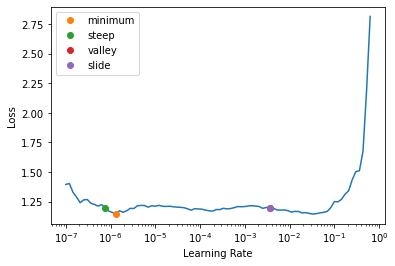

In [ ]:
learn = cnn_learner(dls, squeezenet1_0, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fit_one_cycle(50, lrs.valley)

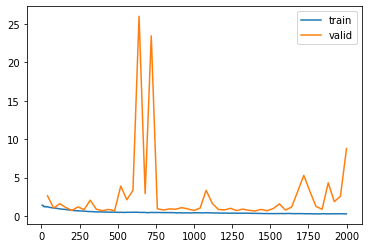

In [ ]:
learn.recorder.plot_loss()

0.8045112781954887 0.7137944822071172 0.6892523364485981 0.6716513394642143 0.6716513394642143 0.7238502450724789
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       205
           1       0.60      0.43      0.50        61

    accuracy                           0.80       266
   macro avg       0.72      0.67      0.69       266
weighted avg       0.79      0.80      0.79       266



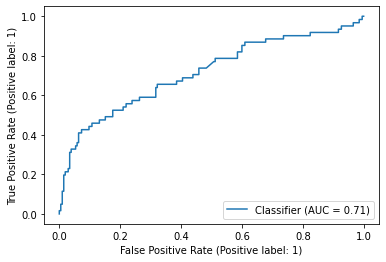

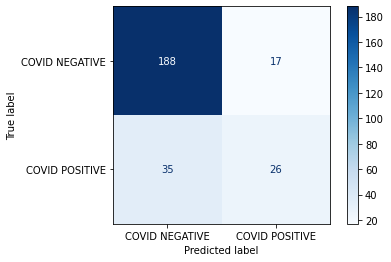

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### densenet121

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


  0%|          | 0.00/30.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.276723,0.733104,0.597345,0.550950,00:22
1,1.223070,0.759414,0.597345,0.584770,00:22
2,1.127649,0.770445,0.575221,0.611295,00:22
3,1.115989,0.839812,0.597345,0.535809,00:22
4,1.108514,0.801713,0.623894,0.540230,00:22
5,1.031774,0.719187,0.659292,0.579686,00:22
6,0.956105,0.690325,0.690265,0.622347,00:22
7,0.920364,0.693373,0.672566,0.615827,00:22
8,0.845498,0.686211,0.716814,0.635389,00:22
9,0.796051,0.702514,0.699115,0.638926,00:22


Better model found at epoch 0 with accuracy value: 0.5973451137542725.
Better model found at epoch 4 with accuracy value: 0.6238937973976135.
Better model found at epoch 5 with accuracy value: 0.6592920422554016.
Better model found at epoch 6 with accuracy value: 0.6902654767036438.
Better model found at epoch 8 with accuracy value: 0.7168141603469849.
Better model found at epoch 10 with accuracy value: 0.7345132827758789.
Better model found at epoch 13 with accuracy value: 0.73893803358078.
Better model found at epoch 16 with accuracy value: 0.7566371560096741.
Better model found at epoch 17 with accuracy value: 0.76106196641922.
Better model found at epoch 19 with accuracy value: 0.769911527633667.
Better model found at epoch 24 with accuracy value: 0.7831858396530151.
Better model found at epoch 26 with accuracy value: 0.7964601516723633.
Better model found at epoch 46 with accuracy value: 0.8053097128868103.


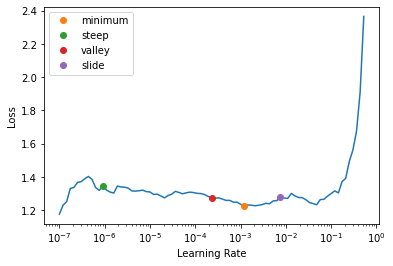

In [ ]:
learn = cnn_learner(dls, densenet121, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fit_one_cycle(50, lrs.valley)

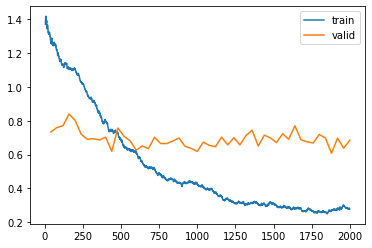

In [ ]:
learn.recorder.plot_loss()

0.7969924812030075 0.728188724510196 0.6863207547169812 0.672530987604958 0.672530987604958 0.7096084717769358
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       205
           1       0.57      0.44      0.50        61

    accuracy                           0.80       266
   macro avg       0.71      0.67      0.69       266
weighted avg       0.78      0.80      0.79       266



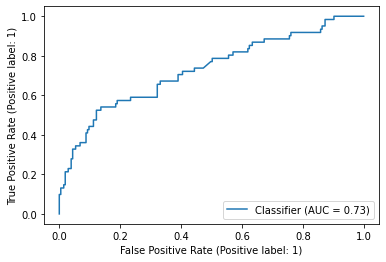

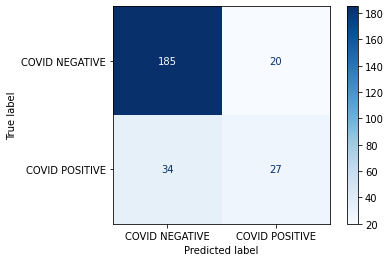

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### xresnet50

Downloading: "https://s3.amazonaws.com/fast-ai-modelzoo/xrn50_940.pth" to /root/.cache/torch/hub/checkpoints/xrn50_940.pth


  0%|          | 0.00/244M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.167298,0.957485,0.495575,0.554156,00:21
1,1.177938,0.925560,0.473451,0.538572,00:20
2,1.161229,0.867536,0.508850,0.539898,00:20
3,1.129941,0.798284,0.575221,0.593943,00:20
4,1.127516,0.718923,0.592920,0.582007,00:20
5,1.118211,0.766566,0.610619,0.670424,00:20
6,1.086352,0.730797,0.628319,0.640805,00:20
7,1.056605,0.732815,0.601770,0.669982,00:20
8,1.016104,0.731838,0.619469,0.587533,00:20
9,0.987633,0.716203,0.637168,0.687887,00:20


Better model found at epoch 0 with accuracy value: 0.4955752193927765.
Better model found at epoch 2 with accuracy value: 0.508849561214447.
Better model found at epoch 3 with accuracy value: 0.5752212405204773.
Better model found at epoch 4 with accuracy value: 0.5929203629493713.
Better model found at epoch 5 with accuracy value: 0.6106194853782654.
Better model found at epoch 6 with accuracy value: 0.6283186078071594.
Better model found at epoch 9 with accuracy value: 0.6371681690216064.
Better model found at epoch 11 with accuracy value: 0.6592920422554016.
Better model found at epoch 14 with accuracy value: 0.6769911646842957.
Better model found at epoch 16 with accuracy value: 0.7035398483276367.
Better model found at epoch 18 with accuracy value: 0.730088472366333.
Better model found at epoch 22 with accuracy value: 0.747787594795227.
Better model found at epoch 26 with accuracy value: 0.752212405204773.
Better model found at epoch 29 with accuracy value: 0.7566371560096741.
Bet

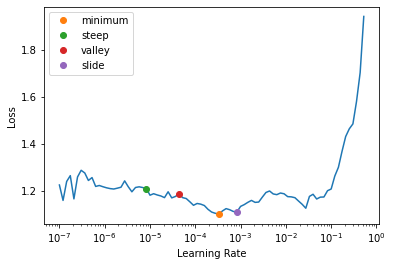

In [ ]:
learn = cnn_learner(dls, xresnet50, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fit_one_cycle(50, lrs.valley)

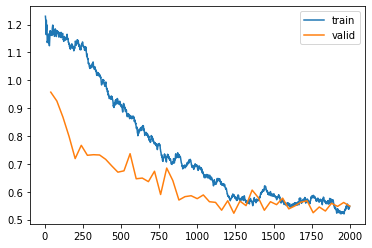

In [ ]:
learn.recorder.plot_loss()

0.7894736842105263 0.7358656537385047 0.6950790141652338 0.6906837265093962 0.6906837265093962 0.7001594896331739
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       205
           1       0.54      0.51      0.53        61

    accuracy                           0.79       266
   macro avg       0.70      0.69      0.70       266
weighted avg       0.78      0.79      0.79       266



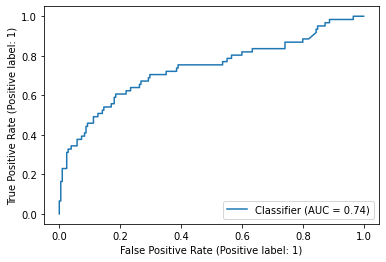

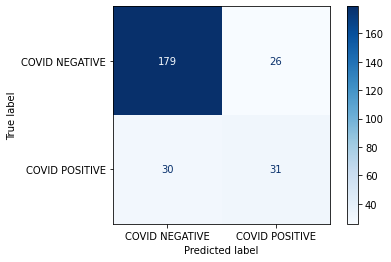

In [ ]:
xx = learn.load("/content/models/model")

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(acc, rocauc, fone, rec, spc, prec)
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')
#print(str(acc)+'\t'+str(rocauc)+'\t'+str(fone)+'\t'+ str(rec)+'\t'+str(spc)+'\t'+ str(prec))

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()